In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
nydf= pd.read_csv('/content/sample_data/NY-House-Dataset.csv')

In [4]:
nydf.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [5]:
nydf.shape


(4801, 17)

In [6]:
nydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [7]:
#Check for null values
nydf.isnull().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

In [8]:
#Check for duplicate rows
nydf.duplicated().value_counts()

False    4587
True      214
dtype: int64

In [9]:
nydf.drop_duplicates(inplace=True)

# *Exploratory Data Analysis*

In [10]:
nydf['TYPE'].value_counts()

Co-op for sale                1388
House for sale                 966
Condo for sale                 842
Multi-family home for sale     699
Townhouse for sale             288
Pending                        229
Contingent                      87
Land for sale                   47
For sale                        20
Foreclosure                     14
Condop for sale                  4
Coming Soon                      2
Mobile house for sale            1
Name: TYPE, dtype: int64

In [11]:
nydf['TYPE'].isnull().value_counts()

False    4587
Name: TYPE, dtype: int64

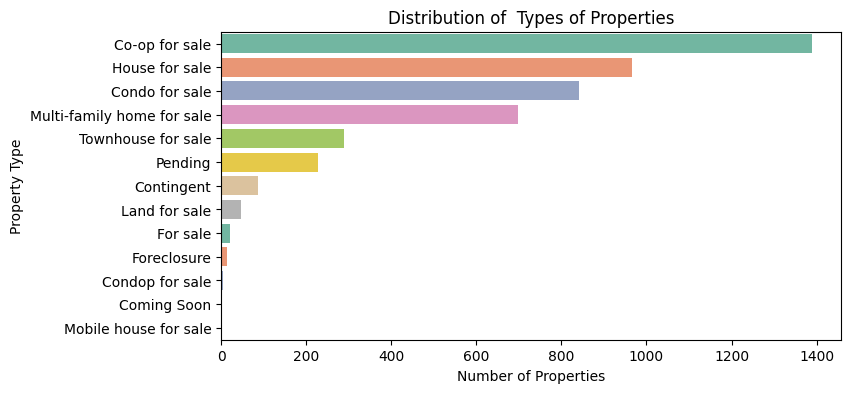

In [22]:
#Distribution of Types of Properties
x1=nydf['TYPE'].value_counts().index
y1= nydf['TYPE'].value_counts().values
plt.figure(figsize=(8,4))
sns.barplot(x=y1,y=x1,hue=x1,palette='Set2')
plt.title('Distribution of  Types of Properties')
plt.xlabel('Number of Properties')
plt.ylabel('Property Type')
plt.legend
plt.show()

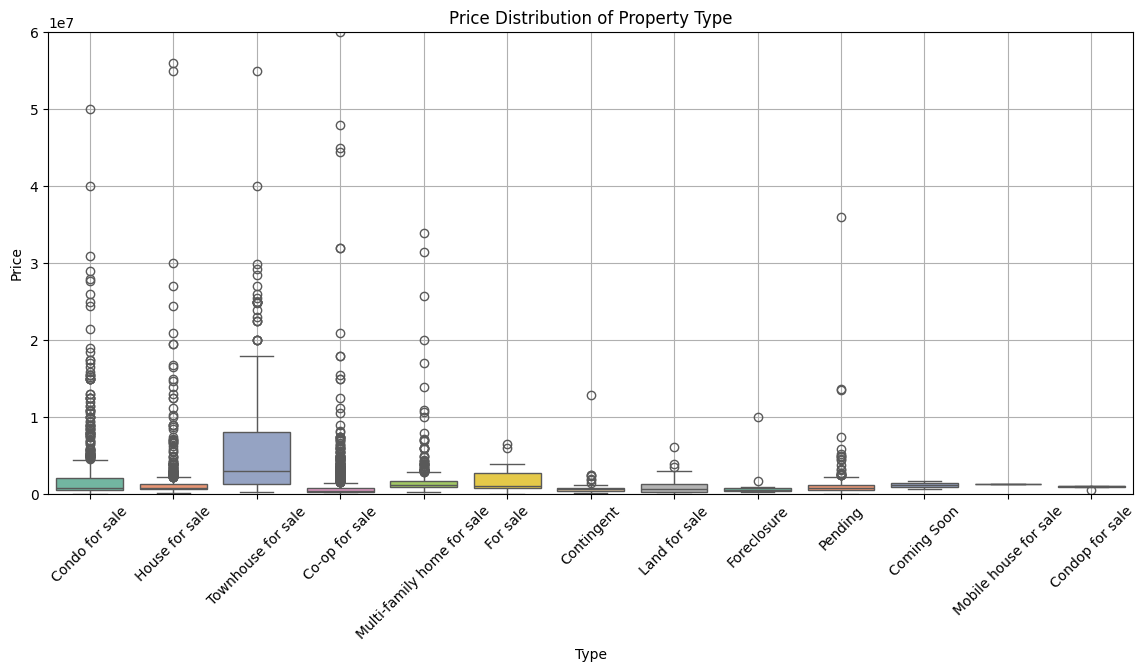

In [23]:
#Price Distribution of Property Type
plt.figure(figsize=(14,6))
sns.boxplot(y='PRICE',x='TYPE',data=nydf,hue='TYPE',palette='Set2')
plt.ylim(0,60000000)
plt.xticks(rotation=45)
plt.title('Price Distribution of Property Type')
plt.ylabel('Price')
plt.xlabel('Type')
plt.grid()
plt.show()

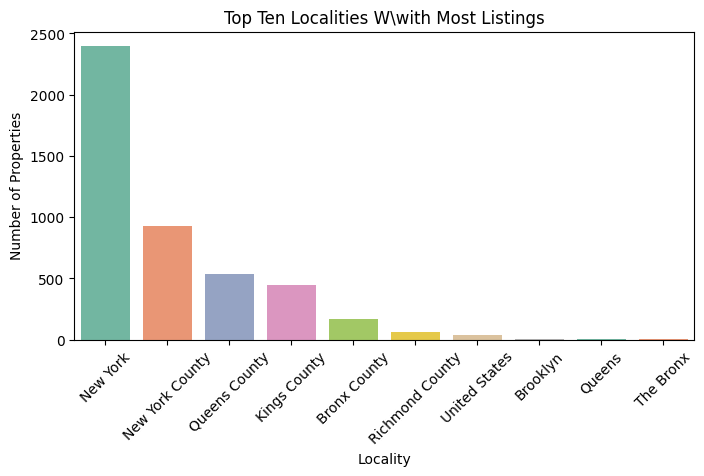

In [24]:
#Top Ten localities with most listings
x1 = nydf['LOCALITY'].value_counts().nlargest(10).index
y1= nydf['LOCALITY'].value_counts().nlargest(10)
plt.figure(figsize=(8,4))
sns.barplot(y=y1,x=x1,hue=x1,palette='Set2')
plt.title('Top Ten Localities W\with Most Listings')
plt.xticks(rotation=45)
plt.xlabel('Locality')
plt.ylabel('Number of Properties')
plt.show()

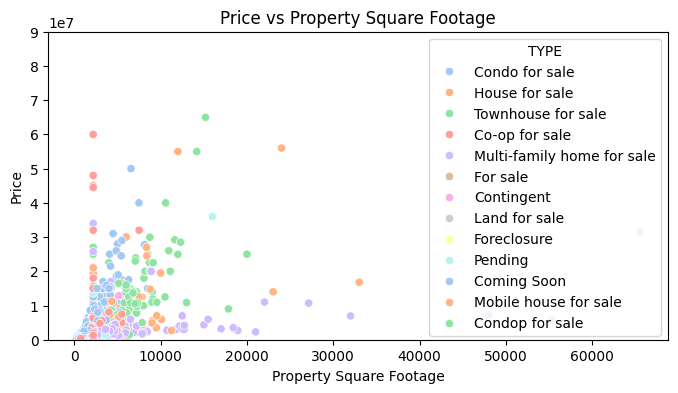

In [25]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='PROPERTYSQFT',y='PRICE',data=nydf,hue='TYPE',palette='pastel')
plt.ylim(0,90000000)
plt.title('Price vs Property Square Footage')
plt.xlabel('Property Square Footage')
plt.ylabel('Price')
plt.show()

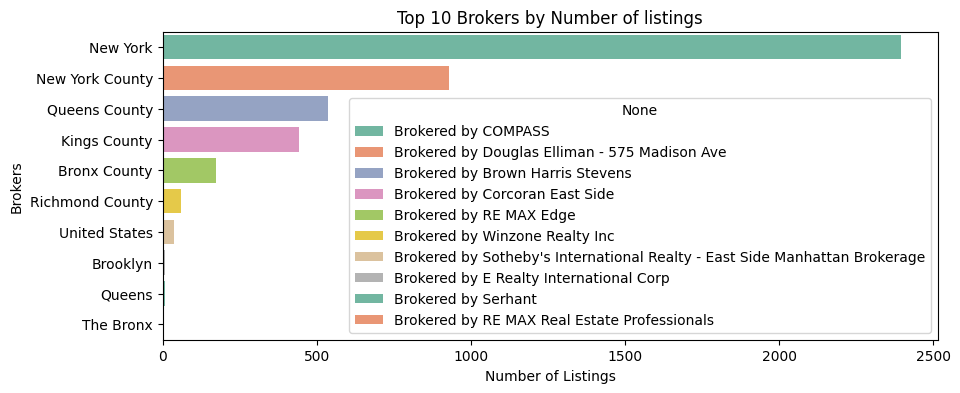

In [26]:
#Top 10 Brokers by Number of listings
plt.figure(figsize=(10,4))
x=nydf['BROKERTITLE'].value_counts().nlargest(10).index
y=nydf['BROKERTITLE'].value_counts().nlargest(10).values
sns.barplot(y=x1,x=y1,hue=x,palette='Set2')
plt.title('Top 10 Brokers by Number of listings')
plt.ylabel('Brokers')
plt.xlabel('Number of Listings')
plt.show()

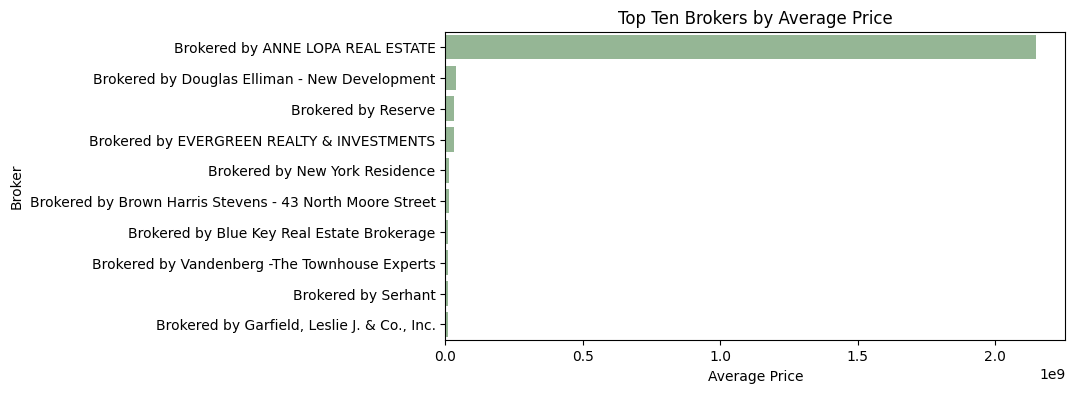

In [27]:
#Top Ten Brokers by Average Price
top_brokers = nydf.groupby('BROKERTITLE')['PRICE'].mean().nlargest(10)
x1=top_brokers.index
y1=top_brokers.values
plt.figure(figsize=(8,4))
sns.barplot(y=x1,x=y1,color='darkseagreen')
plt.title('Top Ten Brokers by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Broker')
plt.legend
plt.show()

In [28]:
#Price per Square Foot
nydf['PRICEPERSQFT']=nydf['PRICE']/nydf['PROPERTYSQFT']

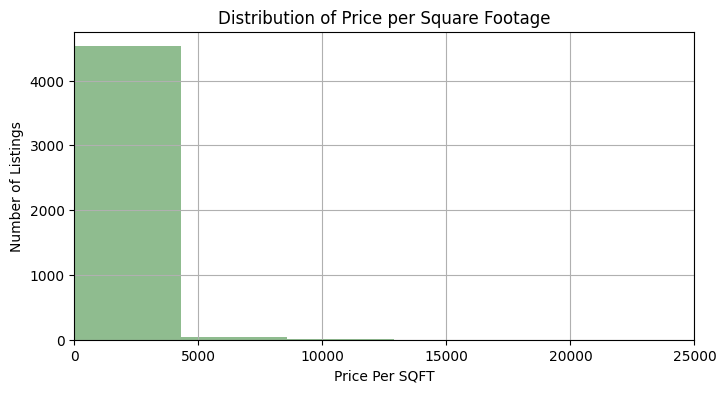

In [29]:
plt.figure(figsize=(8,4))
nydf['PRICEPERSQFT'].hist(bins=50,color='darkseagreen')
plt.title('Distribution of Price per Square Footage')
plt.xlabel('Price Per SQFT')
plt.ylabel('Number of Listings')
plt.xlim(0,25000)
plt.legend
plt.show()


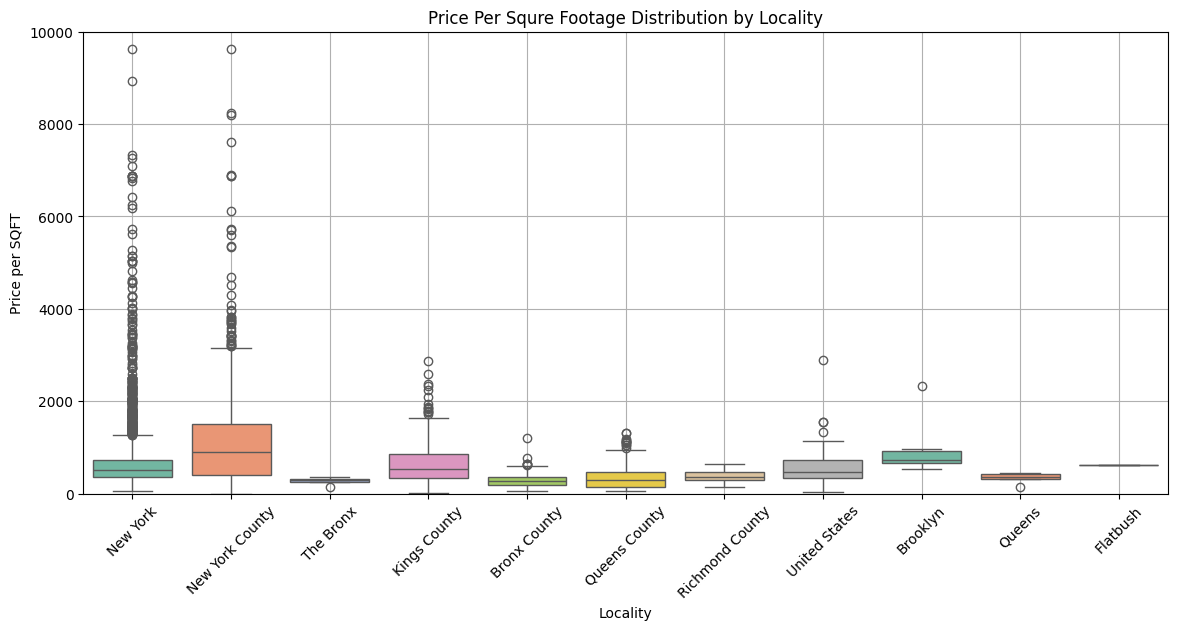

In [30]:
#Price Per Squre Footage Distribution by Locality
plt.figure(figsize=(14,6))
sns.boxplot(x='LOCALITY',y='PRICEPERSQFT',data=nydf,hue='LOCALITY',palette='Set2')
plt.title('Price Per Squre Footage Distribution by Locality')
plt.ylabel('Price per SQFT')
plt.xlabel('Locality')
plt.ylim(0,10000)
plt.xticks(rotation=45)
plt.grid()
plt.show()

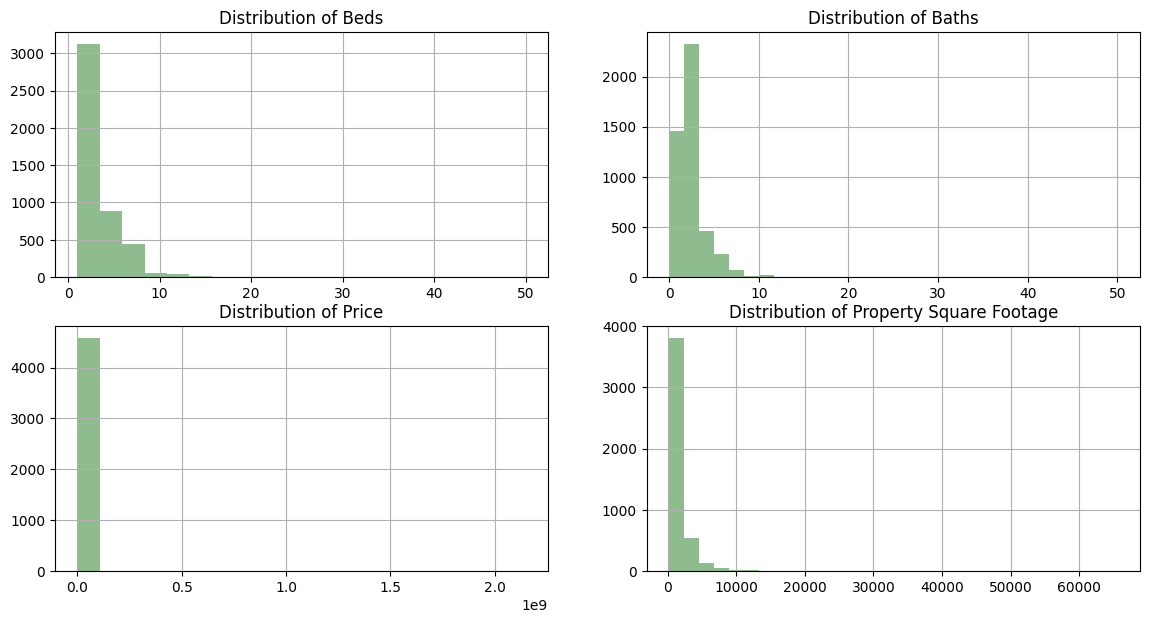

In [31]:
#Histogram on Beds,Bath,Price and Property Square footage
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
nydf['BEDS'].hist(bins=20,color='darkseagreen')
plt.title('Distribution of Beds')
plt.subplot(2,2,2)
nydf['BATH'].hist(bins=30,color='darkseagreen')
plt.title('Distribution of Baths')
plt.subplot(2,2,3)
nydf['PRICE'].hist(bins=20,color='darkseagreen')
plt.title('Distribution of Price')
plt.subplot(2,2,4)
nydf['PROPERTYSQFT'].hist(bins=30,color='darkseagreen')
plt.title('Distribution of Property Square Footage')
plt.legend
plt.show()